# 线性模型和梯度下降
这是一个非常简单的模型，线性回归，同时也会学习一个优化算法-梯度下降法，对这个模型进行优化。线性回归是监督学习里面一个非常简单的模型，同时梯度下降也是深度学习中应用最广的优化算法，我们将从这里开始我们的深度学习之旅。

## 一元线性回归
一元线性模型非常简单，假设我们有变量$x_i$和目标$y_i$，每个$i$对应于一个数据点，希望建立一个模型  $\hat{y}_i = w x_i + b$

$\hat{y}_i$是我们预测的结果，希望通过$\hat{y}_i$来拟合目标$y_i$， 通俗来讲就是找到这个函数拟合$y_i$使得误差最小，即最小化$\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2$

那么如何最小化这个误差呢  
这里需要用到梯度下降，这是我们接触到的第一个优化算法，非常简单，但是却非常强大，在深度学习中被大量使用，所以让我们从简单的例子出发了解梯度下降的原理。

## 梯度下降法
在梯度下降法中，首先要明确梯度的概念，随后我们再了解如何使用梯度进行下降。

### 梯度
梯度在数学上就是导数，如果是一个多元函数，那么梯度就是偏导数。比如一个函数$f(x,y)$,那么$f$的梯度就是$(\frac{\partial f}{\partial x},\frac{\partial f}{\partial y})$

可以称为grad$f(x,y)$或者$\nabla f(x, y)$。具体一点$(x_0, y_0)$的梯度就是$\nabla f(x, y)$ 

下面这个图片是$f(x) = x^2$这个函数在x=1处的梯度
![](https://camo.githubusercontent.com/ca88693838d8900f64ebf6e6eed4cfd999496325/68747470733a2f2f7773332e73696e61696d672e636e2f6c617267652f303036744e6337396c7931666d6172627568326a336a333062613062383073792e6a7067)

梯度有什么意义呢？从几何意义上来讲，一个点的梯度值是这个函数变化最快的地方，具体来说，对于函数$f(x,y)$，在点$(x_0,y_0)$处，沿着梯度$\nabla f(x, y)$的方向，函数增加最快，也就是说沿着梯度的方向，我们能够更快的找到函数的极大值点，或者反过来沿着梯度的反方向，能够更快的找到函数的最小值点。

### 梯度下降法
有了对梯度的理解，我们就能了解梯度下降发的原理了。上面我们需要最小化这个误差，也就是需要找到这个误差的最小值点，那么沿着梯度的反方向我们就能够找到这个最小值点。

我们可以来看一个直观的解释。比如我们在一座大山上的某处位置，由于我们不知道怎么下山，于是决定走一步算一步，也就是在每走到一个位置的时候，求解当前位置的梯度，沿着梯度的负方向，也就是当前最陡峭的位置向下走一步，然后继续求解当前位置梯度，向这一步所在位置沿着最陡峭最易下山的位置走一步。这样一步步的走下去，一直走到觉得我们已经到了山脚。当然这样走下去，有可能我们不能走到山脚，而是到了某一个局部的山峰低处。

类比我们的问题，就是沿着梯度的反方向，我们不断改变$w$和$b$的值，最终找到一组最好的$w$和$b$,使得误差最小。

在更新的时候，我们需要决定每次更新的幅度，比如在下山的例子中，我们需要每次往下走的那一步的长度，这个长度称为学习率，用 $\eta$ 表示，这个学习率非常重要，不同的学习率都会导致不同的结果，学习率太小会导致下降非常缓慢，学习率太大又会导致跳动非常明显，可以看看下面的例子
![](https://camo.githubusercontent.com/acf4bf18294bd5379abf9cb1485aab86d65dfc04/68747470733a2f2f7773322e73696e61696d672e636e2f6c617267652f303036744e6337396c7931666d676e32336c6e7a6a673330393830676f67736f2e676966)
可以看到上面的学习率较为合适，而下面的学习率太大，就会导致不断跳动

最后我们的更新公式就是![](https://render.githubusercontent.com/render/math?math=w%20%3A%3D%20w%20-%20%5Ceta%20%5Cfrac%7B%5Cpartial%20f%28w%2C%5C%20b%29%7D%7B%5Cpartial%20w%7D%20%5C%5C%0Ab%20%3A%3D%20b%20-%20%5Ceta%20%5Cfrac%7B%5Cpartial%20f%28w%2C%5C%20b%29%7D%7B%5Cpartial%20b%7D&mode=display)
通过不断地迭代更新，最终我们能够找到一组最优的$w$和$b$，这就是梯度下降法的原理。

最后可以通过这张图形象地说明一下这个方法![](https://camo.githubusercontent.com/7f5d5e6b896126d54747abcc5628b3610a30cf5a/68747470733a2f2f7773332e73696e61696d672e636e2f6c617267652f303036744e6337396c7931666d617278736c7466716a33306778303931676e342e6a7067)

In [1]:
import torch
import numpy as np
from torch.autograd import Variable
torch.manual_seed(2018)

In [9]:
# 读入数据
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

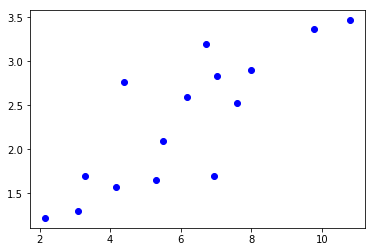

In [10]:
# 画出图像
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_train, y_train, 'bo')

In [11]:
# 转换成Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# 定义参数w和b
# 随机初始化
w = Variable(torch.randn(1), requires_grad=True) 
# 初始化0
b = Variable(torch.zeros(1), requires_grad=True)

In [12]:
# 构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(X):
    return X * w + b

In [13]:
y_ = linear_model(x_train)

经过上面的步骤我们就定义好了模型，在进行参数更新之前，我们可以先看看模型的输出结果长什么样

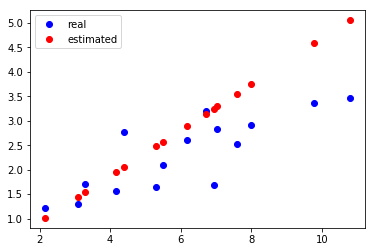

In [15]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

**思考：红色的点表示预测值，似乎排列成一条直线，请思考一下这些点是否在一条直线上**  
这个时候需要计算误差函数，也就是$\frac{1}{n}\sum_{i=1}^n(\hat{y}_i - y_i)^2$

In [16]:
# 计算误差
def get_loss(y_, y):
    return torch.mean((y_ - y) ** 2)
loss = get_loss(y_, y_train)

In [17]:
print(loss)

Variable containing:
 0.6740
[torch.FloatTensor of size 1]



定义好了误差，接下来需要计算$w$和$b$的梯度了，这时得益于PyTorch的自动求导，不需要手动去算梯度

手算的梯度:$\frac{\partial}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i(w x_i + b - y_i),
    \frac{\partial}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)$

In [18]:
# 自动求导
loss.backward()

In [19]:
# 查看w, b梯度
print(w.grad)
print(b.grad)

Variable containing:
 8.5503
[torch.FloatTensor of size 1]

Variable containing:
 1.0291
[torch.FloatTensor of size 1]



In [20]:
# 更新一次参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

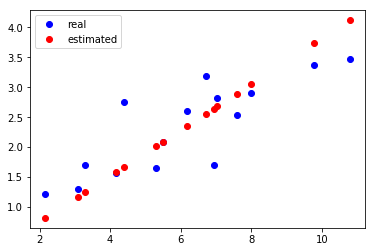

In [21]:
# 更新完参数后，我们再一次看看模型输出的结果
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(),y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(),y_.data.numpy(), 'ro', label='estimated')
plt.legend()

从上面的例子可以看出，更新之后红色的线跑到了蓝色的线下面，没有特别好的拟合蓝色的真实值，所以我们需要进行几次更新

In [22]:
for epoch in range(10):
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    # 归零梯度
    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    
    w.data = w.data - 1e-2*w.grad.data
    b.data = b.data - 1e-2*b.grad.data
    print('epoch: {}, loss: {}'.format(epoch, loss.data[0]))

epoch: 0, loss: 0.2525334060192108
epoch: 1, loss: 0.244352787733078
epoch: 2, loss: 0.2438223510980606
epoch: 3, loss: 0.24343542754650116
epoch: 4, loss: 0.2430531084537506
epoch: 5, loss: 0.24267280101776123
epoch: 6, loss: 0.24229441583156586
epoch: 7, loss: 0.24191799759864807
epoch: 8, loss: 0.2415434867143631
epoch: 9, loss: 0.2411709427833557


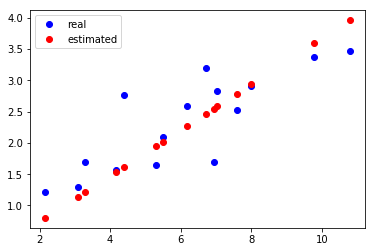

In [23]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

经过10次更新，发现红色的预测结果已经比较好的拟合了蓝色的真实值

# 多项式回归模型
什么是多项式回归呢？非常简单，根据上面的线性回归模型$\hat{y} = w x + b$ 这里是关于$x$的一个一次多项式，这个模型比较简答，没有办法拟合比较复杂的模型，所以我们可以使用更高次的模型，比如$\hat{y} = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \cdots$ 这样就能够拟合更加复杂的模型，这就是多项式模型，这里使用了$x$的更高次，同理还有多元回归模型，形式也是一样的，只是除了使用$x$，还是有更多的变量，比如y,z等，同时他们的loss函数和简答的线性回归模型是一致的。

首先我们定义一个需要拟合的目标函数，这个函数是个三次的多项式。

In [24]:
# 定义一个多变量函数
w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(b_target[0], w_target[0], w_target[1], w_target[2])
print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


我们可以先画出这个函数的曲线

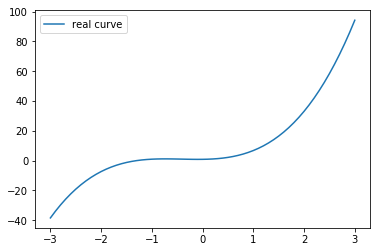

In [25]:
# 画出这个函数的曲线
x_samples = np.arange(-3, 3.1, 0.1)
y_samples = b_target[0] + w_target[0] * x_samples + w_target[1] * x_samples ** 2 + w_target[2] * x_samples ** 3
plt.plot(x_samples, y_samples, label='real curve')
plt.legend()

接着我们可以构建数据集，需要$x$和$y$,同时是一个三次多项式，所以我们取$x$, $x^2$, $x^3$

In [27]:
# 构建数据x 和 y
# x是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果[y]

x_train = np.stack([x_samples ** i for i in range(1, 4)], axis=1)
x_train = torch.from_numpy(x_train).float() # 转换成float tensor
y_train = torch.from_numpy(y_samples).float().unsqueeze(1) # 转换成float tensor

接着我们可以定义需要优化的参数，就是前面这个函数里面的$w_i$

In [28]:
# 定义参数和模型
w = Variable(torch.randn(3,1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

# 将x和y转换成Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return torch.mm(x, w) + b

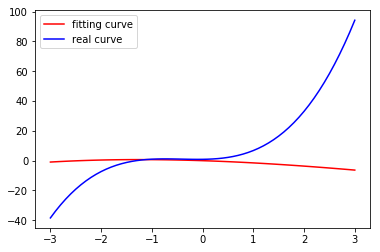

In [29]:
# 画出更新之前的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_samples, label='real curve', color='b')
plt.legend()

In [30]:
# 这两条曲线的误差和一元的线性模型的误差是相同的，前面已经定义过get_loss
loss = get_loss(y_pred, y_train)
print(loss)

Variable containing:
 1008.7871
[torch.FloatTensor of size 1]



In [31]:
# 自动求导
loss.backward()

In [32]:
# 查看一下w 和 b的梯度
print(w.grad)
print(b.grad)

Variable containing:
 -92.1842
-123.2529
-601.3099
[torch.FloatTensor of size 3x1]

Variable containing:
-22.8959
[torch.FloatTensor of size 1]



In [33]:
# 更新一下参数
w.data = w.data - 0.001*w.grad.data
b.data = b.data - 0.001*b.grad.data

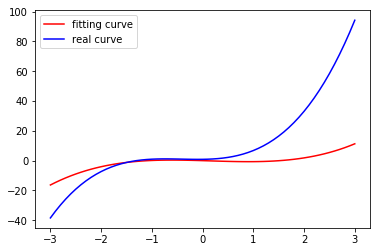

In [34]:
# 画出更新后的模型
y_pred = multi_linear(x_train)
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_samples, label='real curve', color='b')
plt.legend()

看到还是有差异，不过我们可以继续进行迭代

In [35]:
# 100 次迭代
for epoch in range(100):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    w.data = w.data - 0.001*w.grad.data
    b.data = b.data - 0.001*b.grad.data
    
    if (epoch + 1) % 20 == 0:
        print('epoch :{} , loss : {}'.format(epoch+1, loss.data[0]))

epoch :20 , loss : 52.10027313232422
epoch :40 , loss : 12.700457572937012
epoch :60 , loss : 3.4888031482696533
epoch :80 , loss : 1.3191393613815308
epoch :100 , loss : 0.7936816811561584


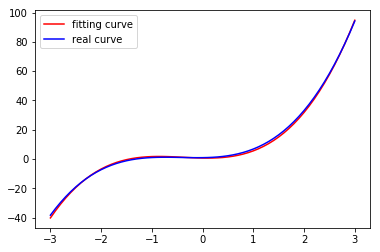

In [36]:
# 画出更新后的结果
y_pred = multi_linear(x_train)
plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_samples, label='real curve', color='b')
plt.legend()

可以看到，经过 100 次更新之后，可以看到拟合的线和真实的线已经完全重合了